In [3]:
import Pkg

Pkg.activate(@__DIR__) # `@__DIR__` always gives the directory of where it was run

Pkg.add("Random")
Pkg.add("Statistics")
Pkg.add("CairoMakie")
Pkg.add("Distributions")

Pkg.status()

  Activating project at `c:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter2`
   Resolving package versions...
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter2\Project.toml`
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter2\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter2\Project.toml`
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter2\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter2\Project.toml`
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter2\Manifest.toml`
   Resolving package versions...
    Updating `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter2\Project.toml`
  [31c24e10] + Distributions v0.25.109
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter2\Manifest.toml`


Status `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter2\Project.toml`
  [13f3f980] CairoMakie v0.12.3
  [31c24e10] Distributions v0.25.109
  [9a3f8284] Random
  [10745b16] Statistics v1.10.0


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie C:\Users\nguye\.julia\packages\Makie\qMluh\src\scenes.jl:227


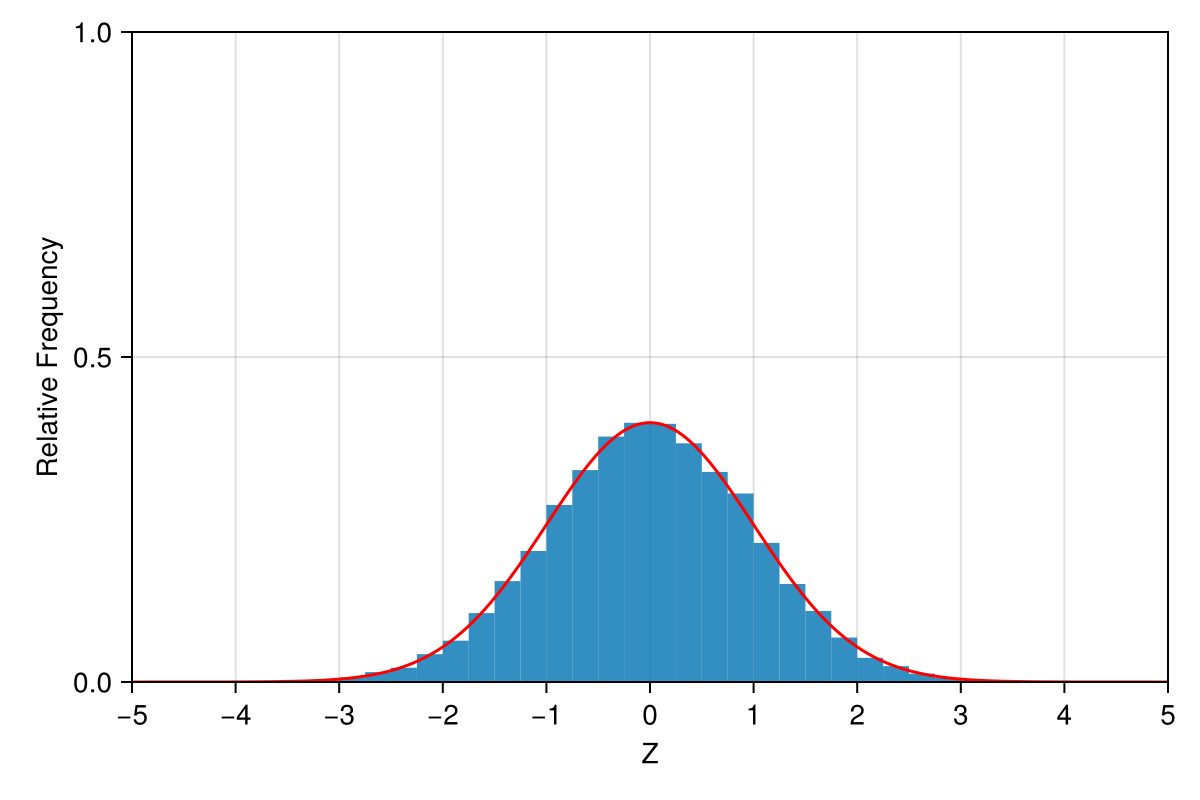

In [29]:
using Random, Statistics, CairoMakie, Distributions


function p2_2(sampleSize::Int)
    return sin.(2π .* rand(Uniform(0, 1), sampleSize))
end

function TakingSample(
    reps::Int = 10^4,
    sampleSize::Int = 10^4,
    seed::Int = 1234
)

    Random.seed!(seed)

    finalSample = zeros(reps)

    for i in 1:reps
        sample = p2_2(sampleSize)

        sampleMean = mean(sample)
        sampleStdErr = (sqrt(0.5)) / sqrt(sampleSize)
        finalSample[i] = (sampleMean - 0) / sampleStdErr
    end

    return finalSample
end

function PlotHistogram(
    reps::Int = 10^4,
    sampleSize::Int = 10^4,
    seed::Int = 1234,
    figure_resolution::Tuple{Int, Int} = (600, 400)
)

    finalSample = TakingSample(reps, sampleSize, seed)

    fig = Figure(resolution = figure_resolution)
    ax = Axis(
        fig[1, 1], 
        xlabel = "Z", ylabel = "Relative Frequency", 
        limits = ((-5, 5), (0.0, 1.0)),
        xticks = -5:1:5
    )

    hist!(ax, finalSample, bins = -5:0.25:5, normalization = :pdf)

    # Also plot standard normal distribution
    x = -5:0.01:5
    y = pdf(Normal(0, 1), x)
    lines!(ax, x, y, color = :red)

    return fig
end

PlotHistogram()